<a href="https://colab.research.google.com/github/divijbuddareddy/medical-report-x-rays-analysis/blob/main/medicalimageanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


In [ ]:
for filename in uploaded.keys():
    print(filename)


archive (2).zip


In [ ]:
import zipfile
import os

zip_path = "archive (2).zip"  # Replace with actual filename from step 1
extract_path = "/content/covid19-dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
os.listdir(extract_path)


['COVID-19_Radiography_Dataset']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Corrected path to point to the directory containing class subfolders
correct_extract_path = f"{extract_path}/COVID-19_Radiography_Dataset"

train_generator = datagen.flow_from_directory(
    correct_extract_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    correct_extract_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 33858 images belonging to 4 classes.
Found 8462 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
outputs = Dense(3, activation='softmax')(x)  # 3 classes

model = Model(inputs=base_model.input, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,040,579 (26.86 MB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)


Epoch 1/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 110s 103ms/step - accuracy: 0.7471 - loss: 0.6561 - val_accuracy: 0.8187 - val_loss: 0.4701
Epoch 2/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 111s 105ms/step - accuracy: 0.7535 - loss: 0.6275 - val_accuracy: 0.8466 - val_loss: 0.4251
Epoch 3/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 109s 103ms/step - accuracy: 0.7594 - loss: 0.6163 - val_accuracy: 0.8496 - val_loss: 0.4139
Epoch 4/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 111s 105ms/step - accuracy: 0.7685 - loss: 0.5996 - val_accuracy: 0.8513 - val_loss: 0.4077
Epoch 5/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 109s 103ms/step - accuracy: 0.7695 - loss: 0.5965 - val_accuracy: 0.8511 - val_loss: 0.4087
Epoch 6/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 110s 104ms/step - accuracy: 0.7652 - loss: 0.5944 - val_accuracy: 0.8529 - val_loss: 0.3990
Epoch 7/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 109s 103ms/step - accuracy: 0.7719 - loss: 0.5852 - val_accuracy: 0.8556 - val_loss: 0.3987
Epoch 8/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 109s 103ms/step - ac

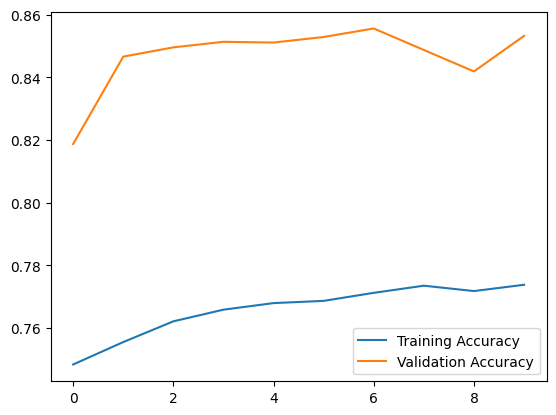

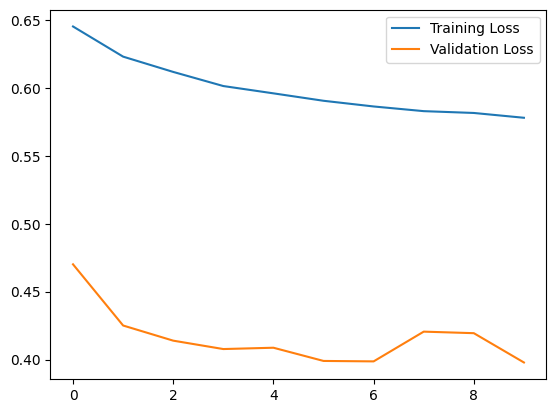

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
model.save('covid_xray_model.h5')


In [ ]:
from google.colab import files
files.download('covid_xray_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(train_generator.class_indices)


{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

model = load_model('covid_xray_model.h5')

# Load and preprocess a new chest X-ray image
img_path = img_path = '/content/covidinput.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape (1, 224, 224, 3)

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

print(f'Predicted class index: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
Predicted class index: [2]


In [ ]:
class_labels = {0: 'COVID-19', 1: 'Normal', 2: 'Pneumonia'}


In [ ]:
predicted_label = class_labels[predicted_class[0]]
print(f'Predicted class: {predicted_label}')


Predicted class: Pneumonia


In [ ]:
# Assuming predicted_class contains the predicted index
class_labels = {0: 'COVID-19', 1: 'Normal', 2: 'Pneumonia'}
predicted_label = class_labels[predicted_class[0]]
print(f'Predicted class: {predicted_label}')


Predicted class: Pneumonia
